# Практическая работа 2 - Кластеризация студентов на основе опроса с использованием методов машинного обучения

Баранов Д.А. ИВТ 2.1

# Введение

Целью данной работы является сегментация студентов на основе их ответов в анкете, касающейся цифровых образовательных практик. Это позволит выявить скрытые группы студентов с различными предпочтениями, что в дальнейшем поможет улучшить содержание и формат онлайн-курсов.

# Понимание бизнес-задачи

Университет заинтересован в адаптации образовательных платформ под реальные потребности студентов. Кластеризация позволяет:

- Персонализировать содержание курсов
- Выделить группы, которым нужен фидбек, видеоматериалы, контроль посещаемости
- Оптимизировать цифровую нагрузку в зависимости от профиля студента

# Понимание данных

- Загрузка Excel-файла
- Размерность: строк x столбцов
- Большинтсво признаков - бинарные
- Указать пропущенные значения
- Построены гистограммы и рассчитаны коэффициенты ФИ для бинарных признаков
- Отобраны признаки для кластеризации (все бинарные), признак "факультет" исключен

In [28]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

Загрузка и первичный анализ

In [29]:
df = pd.read_excel("dlia_studentov.xlsx")
df.head()

,ID,Время создания,На каком факультете/в каком институте Вы обучаетесь?,"Какая платформа для обучения дисциплине ""ИНФОКОММУНИКАЦИОННЫЕ ТЕХНОЛОГИИ"" использовалась?","Был ли предусмотрен фидбек (отклик преподавателя на выполненное задание, например, указание ошибок и как их можно исправить)","Необходим ли фидбек (отклик преподавателя на выполненное задание, например, указание ошибок и как их можно исправить) в электронном курсе?","Был ли автоматический мониторинг присутствия студента на занятии (например, посредством QR-кодов)","Необходим ли автоматический мониторинг присутствия студента на занятии (например, посредством QR-кодов) в электронном курсе?","Материалы, представленные для практического задания, были в разных форматах (например, одновременно и текстовый, и видео)?","Необходимо ли представлять материалы для практического задания в разных форматах (например, одновременно и текстовый, и видео)?",...,Необходим ли встроенный электронный журнал прогресса выполненных работ студентом?,Были ли встроенны в электронный курс видеолекции?,Необходимо ли встраивать в электронный курс видеолекции?,Были ли встроенные в электронный курс тесты по материалом видео лекций?,Была ли предусмотрена рефлексия (отзыв) после выполнения каждого практического задания?,Необходима ли рефлексия (отзыв) после выполнения каждого практического задания?,Была ли предусмотрена рефлексия (отзыв) после завершения работы по дисциплине?,Необходима ли рефлексия (отзыв) после завершения работы по дисциплине?,Было ли организовано взаимодействие с преподавателями посредством мессенджеров?,Необходимо ли организовывать взаимодействие с преподавателями посредством мессенджеров?
0,1408291245,2023-06-07 20:41:17,институт истории и социальных наук,Moodle,нет,нет,нет,нет,да,нет,...,да,да,нет,да,нет,да,нет,да,да,да
1,1405883214,2023-06-05 09:02:21,институт педагогики,Moodle,да,да,нет,да,нет,да,...,да,да,да,да,да,да,да,да,да,да
2,1405869646,2023-06-05 08:44:38,институт педагогики,Moodle,да,да,да,да,да,да,...,да,да,да,да,да,да,да,да,да,да
3,1405856131,2023-06-05 08:26:39,институт педагогики,Moodle,да,да,нет,нет,да,да,...,да,да,да,да,да,да,да,да,да,да
4,1405854542,2023-06-05 08:24:47,институт педагогики,Moodle,да,да,нет,нет,да,да,...,да,да,да,да,нет,нет,да,нет,нет,да


Рамерность и типы данных

In [30]:
print("Размерность набора данных:", df.shape)
print("\nТипы данных:")
print(df.dtypes)

Размерность набора данных: (711, 23)

Типы данных:
ID                                                                                                                                             int64
Время создания                                                                                                                                object
На каком факультете/в каком институте Вы обучаетесь?                                                                                          object
Какая платформа для обучения дисциплине "ИНФОКОММУНИКАЦИОННЫЕ ТЕХНОЛОГИИ" использовалась?                                                     object
Был ли предусмотрен фидбек (отклик преподавателя на выполненное задание, например, указание ошибок и как их можно исправить)                  object
Необходим ли фидбек (отклик преподавателя на выполненное задание, например, указание ошибок и как их можно исправить) в электронном курсе?    object
Был ли автоматический мониторинг присутствия студента н

Проверка пропусков

In [31]:
print("\nКоличество пропущенных значений по столбцам:")
print(df.isnull().sum())


Количество пропущенных значений по столбцам:
ID                                                                                                                                            0
Время создания                                                                                                                                0
На каком факультете/в каком институте Вы обучаетесь?                                                                                          0
Какая платформа для обучения дисциплине "ИНФОКОММУНИКАЦИОННЫЕ ТЕХНОЛОГИИ" использовалась?                                                     0
Был ли предусмотрен фидбек (отклик преподавателя на выполненное задание, например, указание ошибок и как их можно исправить)                  0
Необходим ли фидбек (отклик преподавателя на выполненное задание, например, указание ошибок и как их можно исправить) в электронном курсе?    0
Был ли автоматический мониторинг присутствия студента на занятии (например, посредством QR

Преобразование бинарных значений в 0 и 1

In [32]:
# Список бинарных столбцов (все, кроме ID, времени и факультета)
binary_cols = df.columns[3:]

# "да" в 1, "нет" в 0
df[binary_cols] = df[binary_cols].applymap(lambda x: 1 if str(x).strip().lower() == "да" else 0)

<ipython-input-32-91e345d00d09>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[binary_cols] = df[binary_cols].applymap(lambda x: 1 if str(x).strip().lower() == "да" else 0)


Визуализация распределений по бинарным признакам

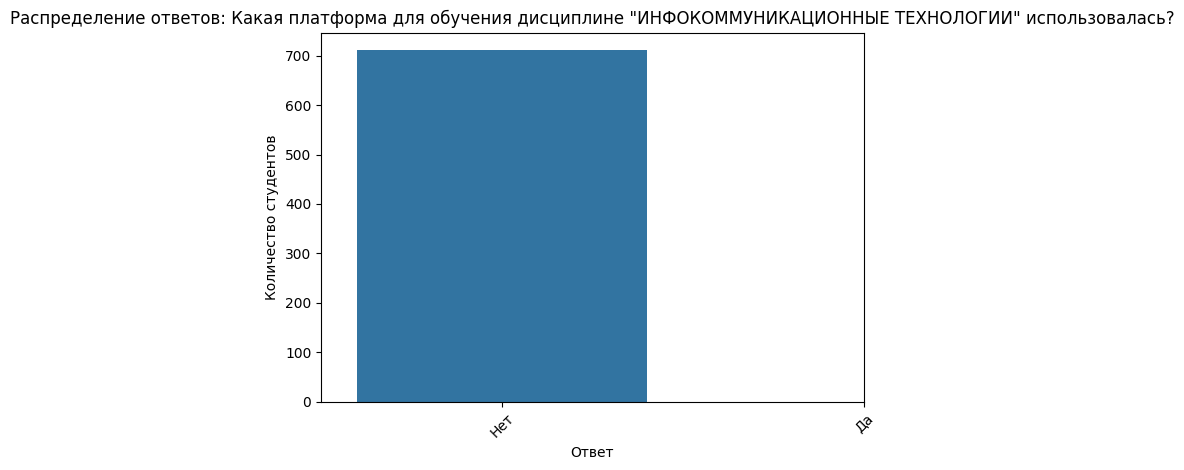

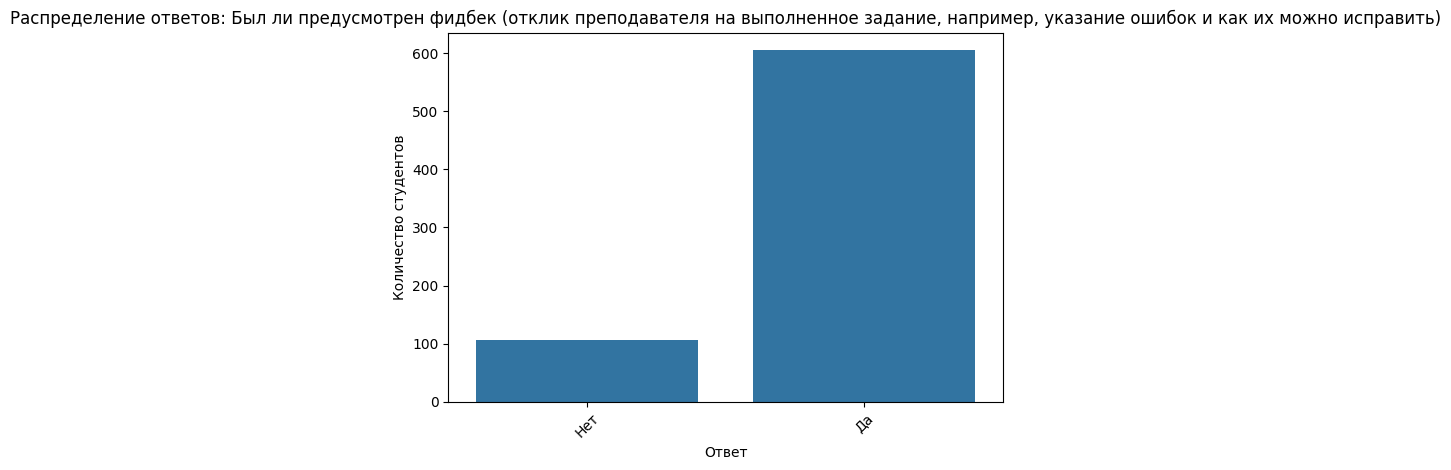

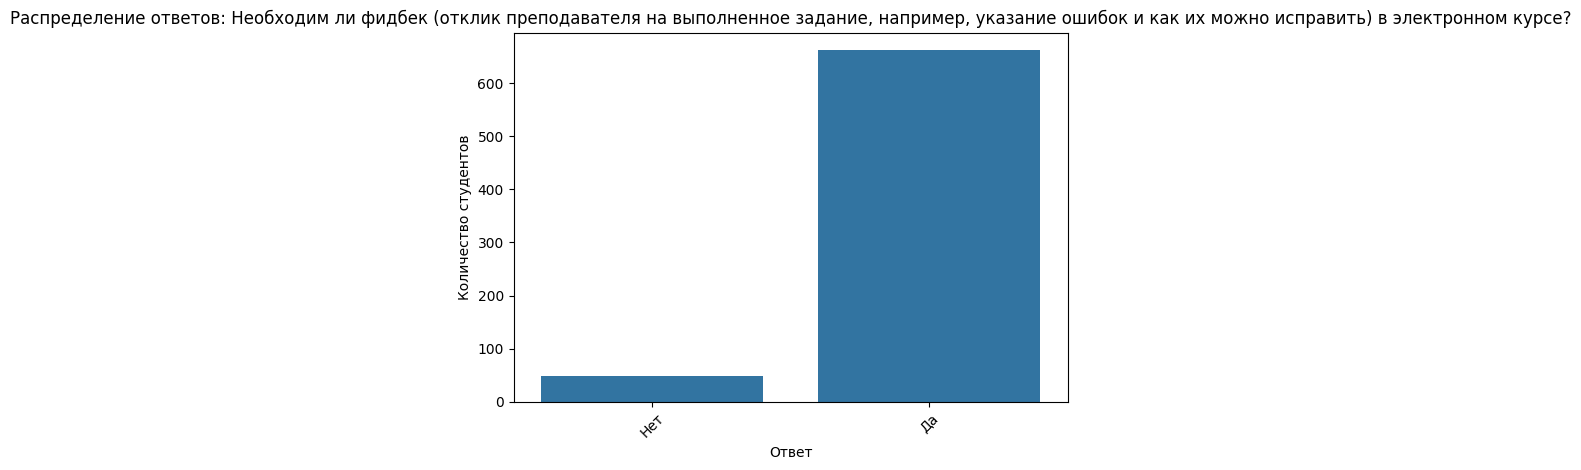

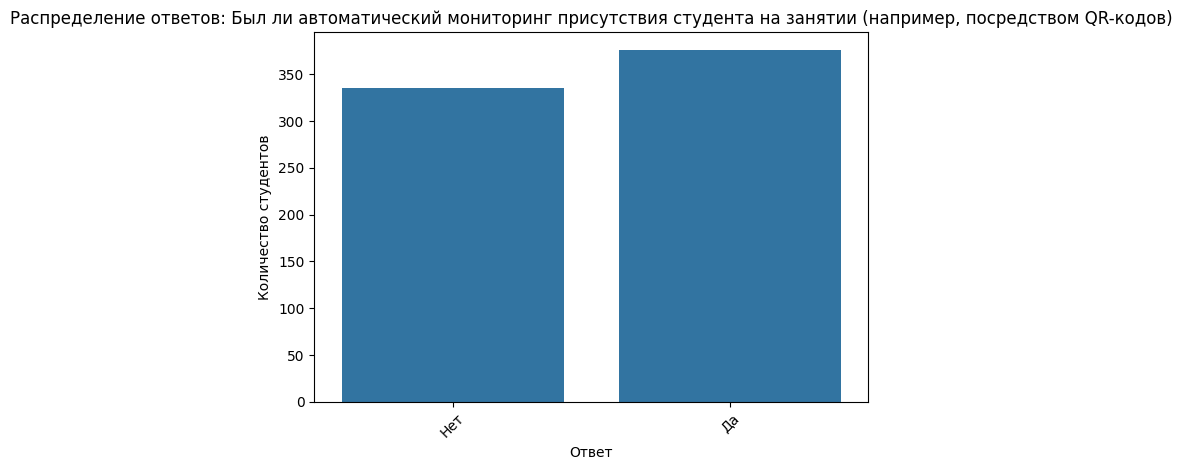

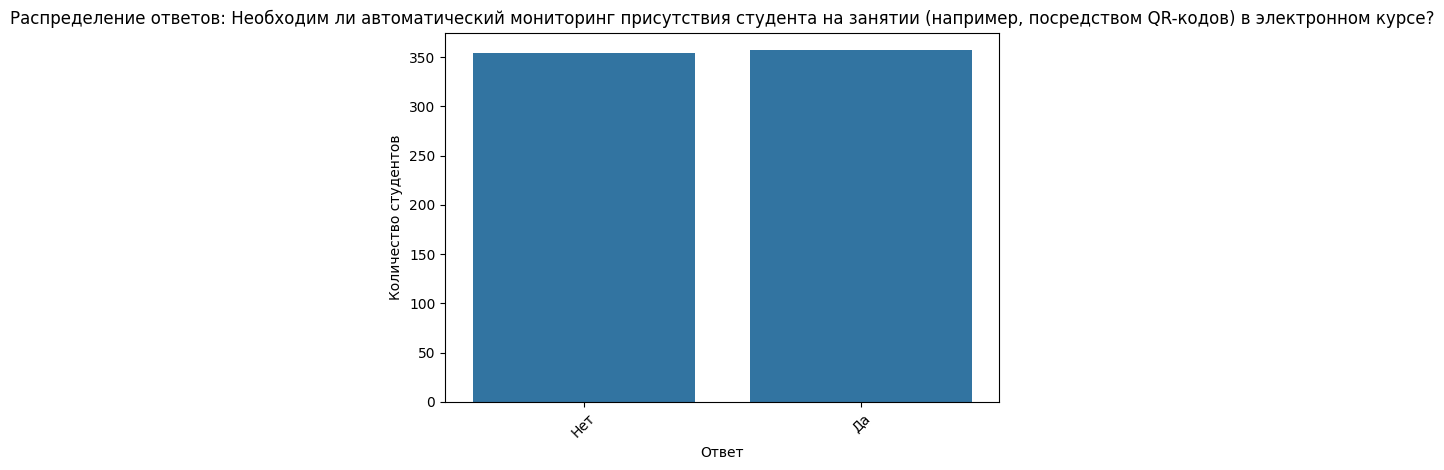

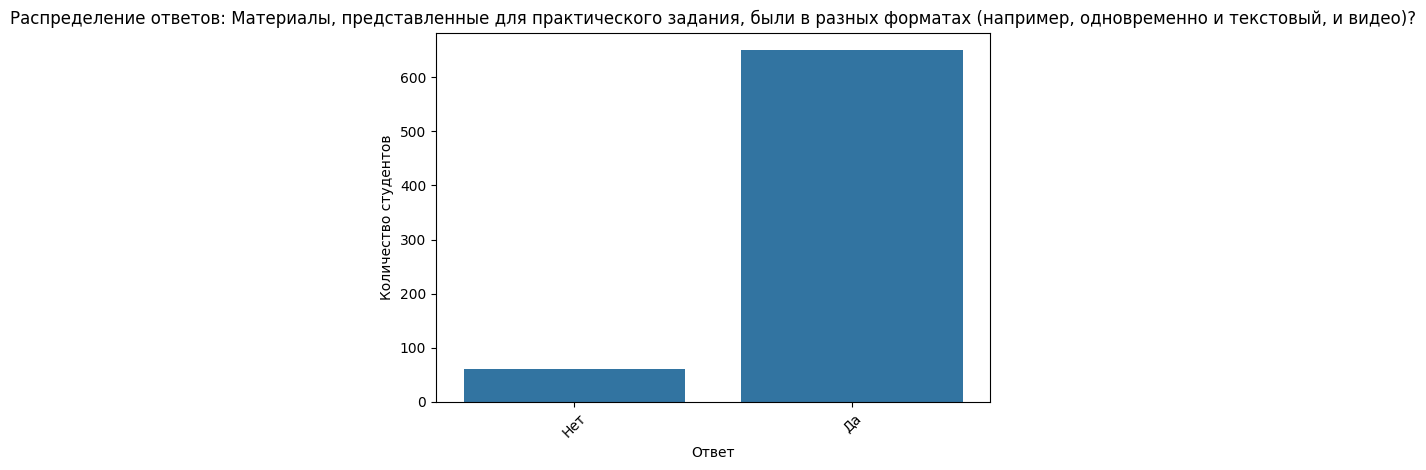

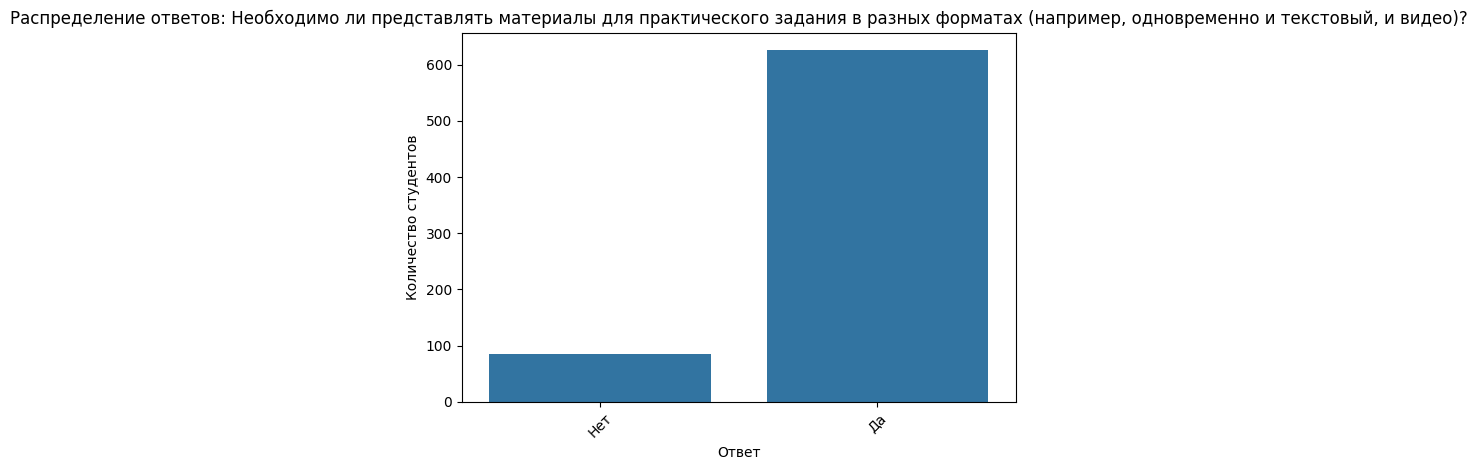

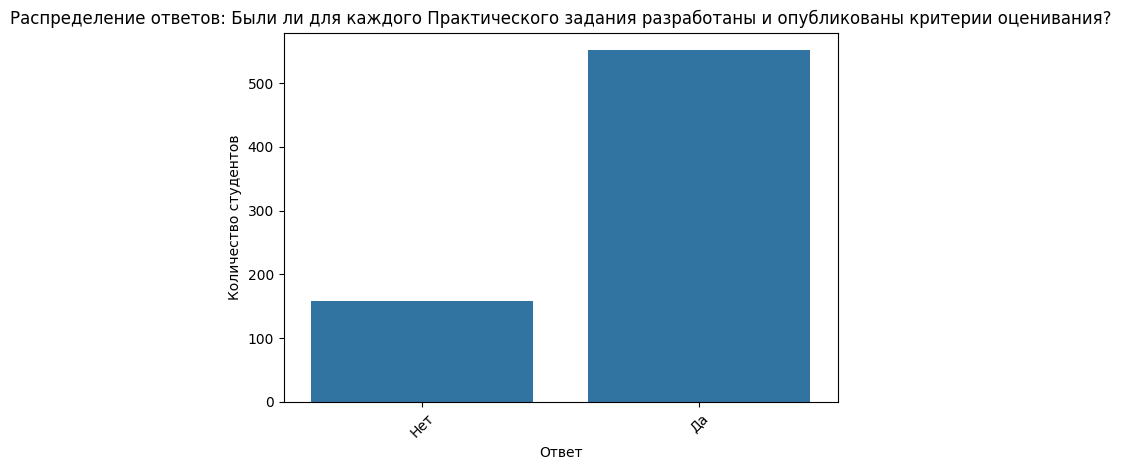

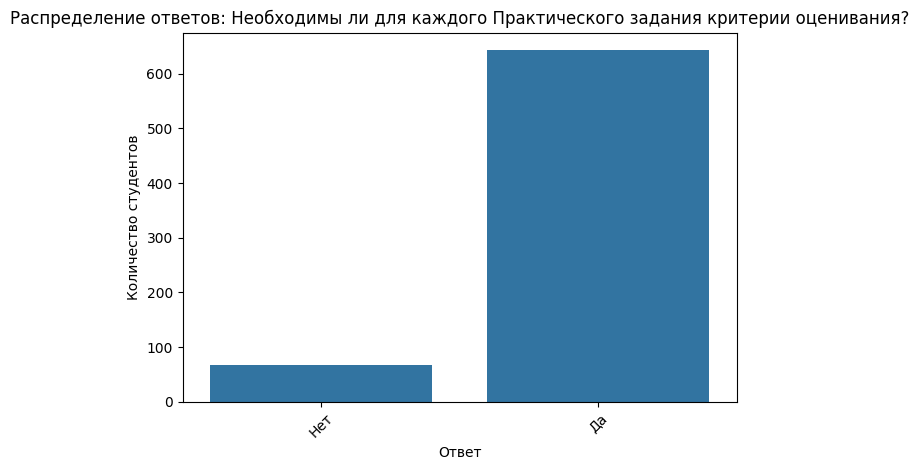

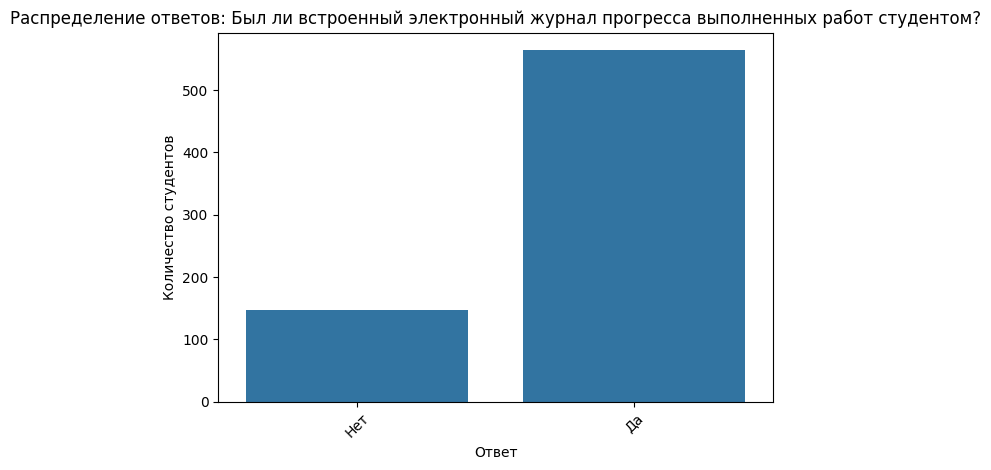

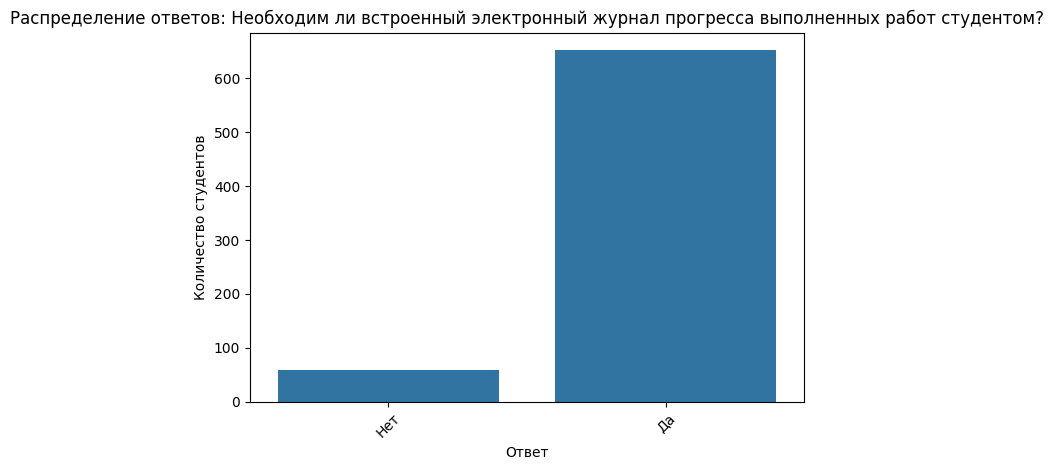

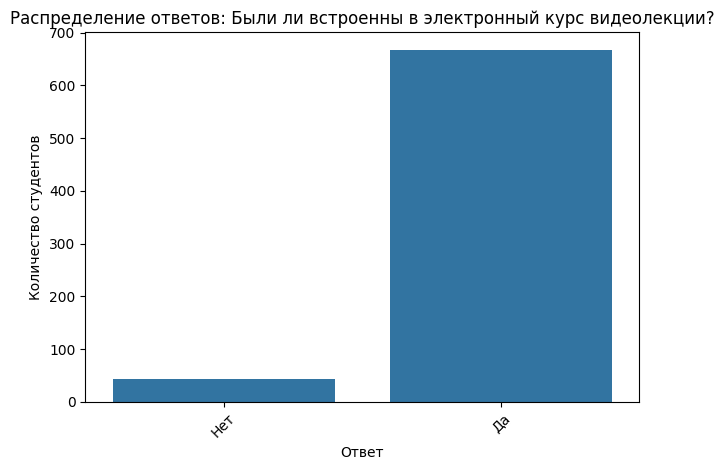

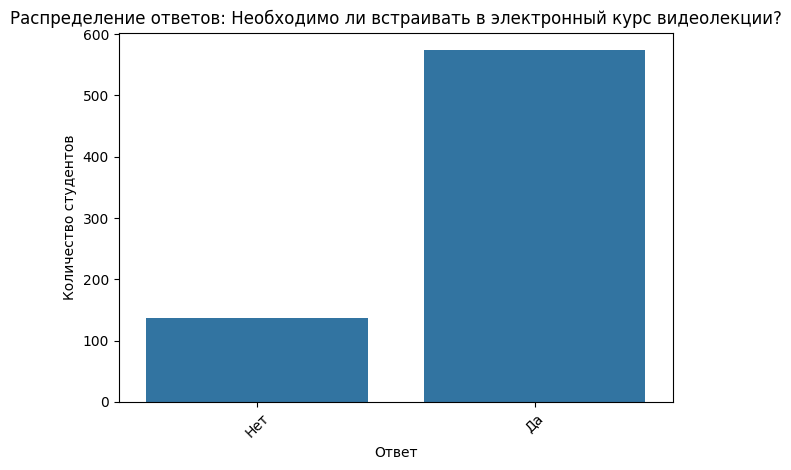

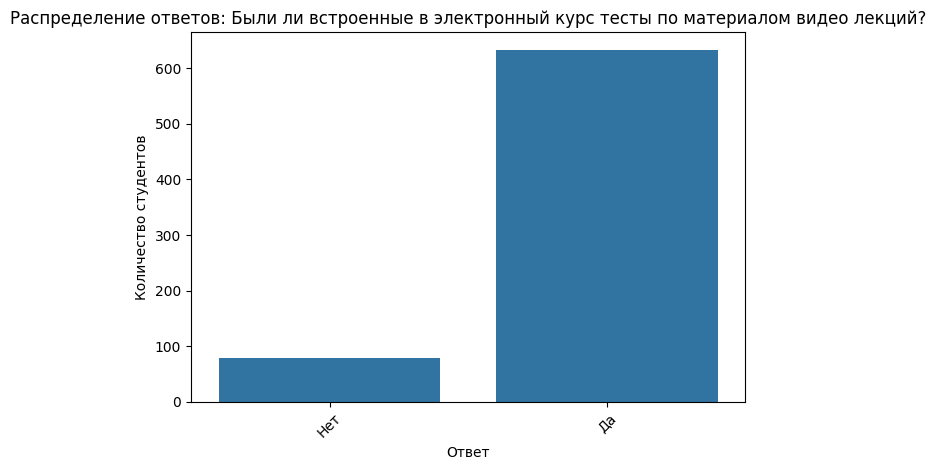

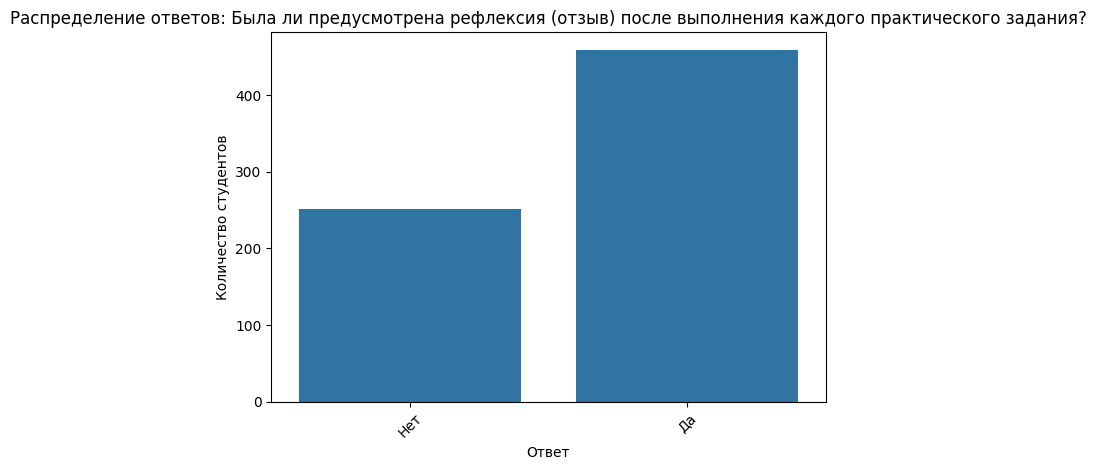

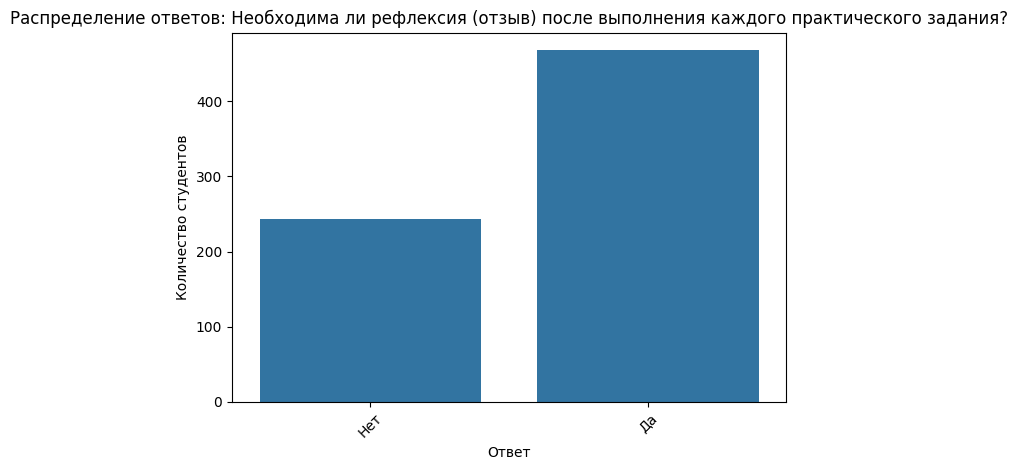

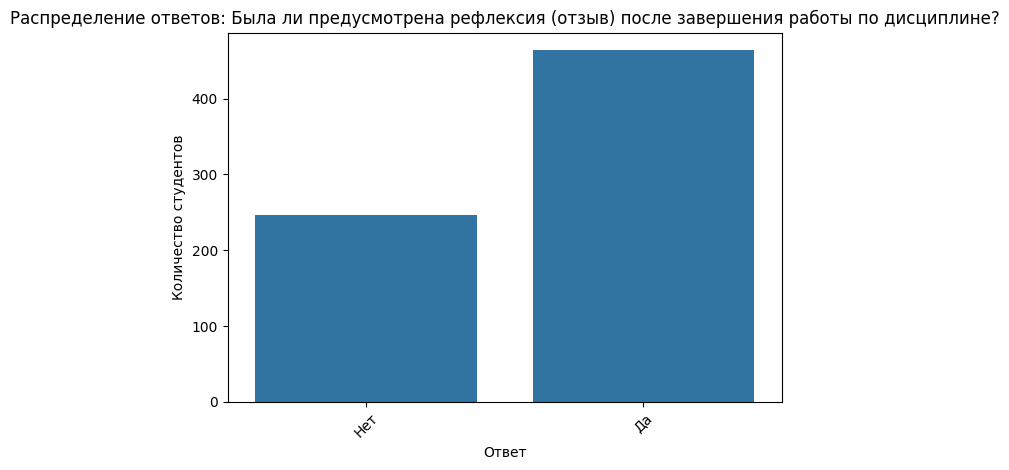

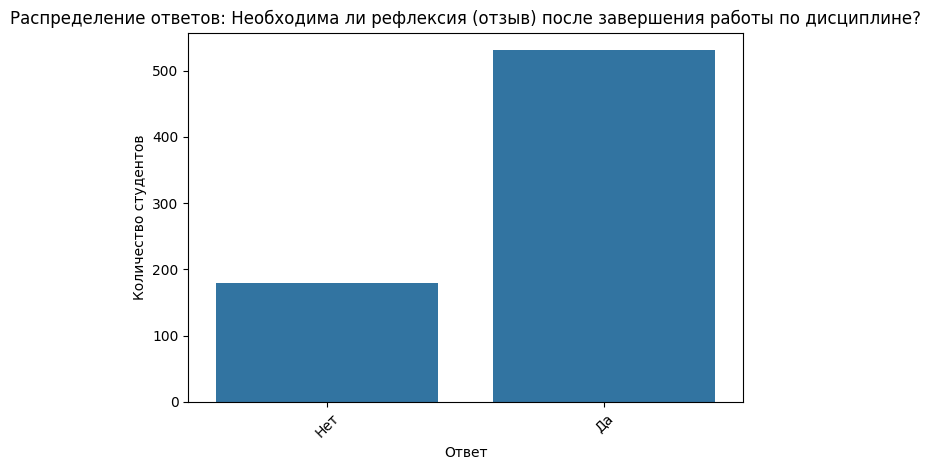

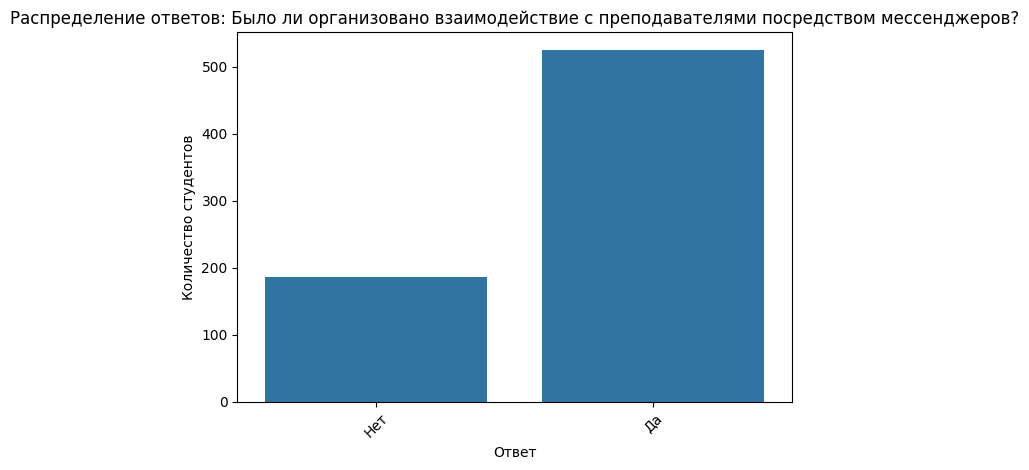

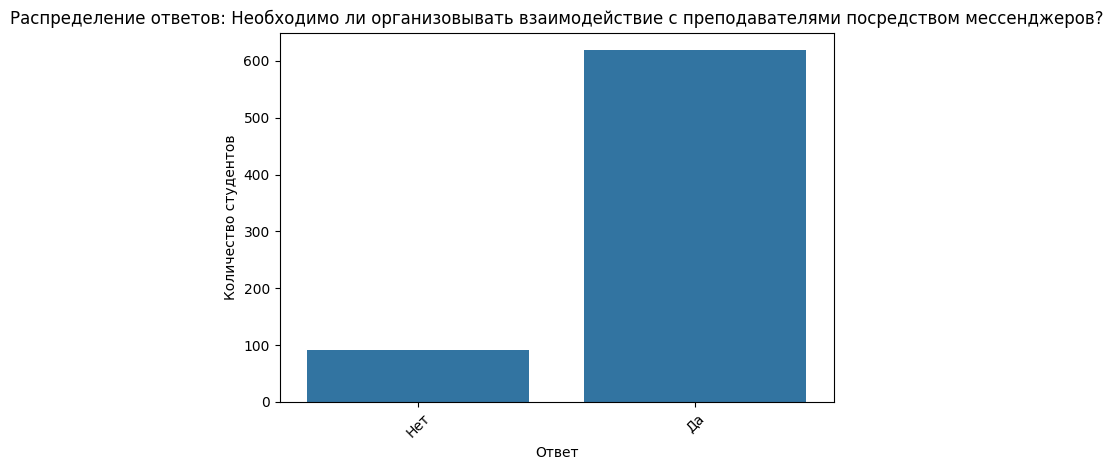

In [33]:
for col in binary_cols:
  sns.countplot(data=df, x=col)
  plt.title(f'Распределение ответов: {col}')
  plt.xlabel("Ответ")
  plt.ylabel("Количество студентов")
  plt.xticks([0, 1], ['Нет', 'Да'])
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

Расчет коэффициентов ФИ (связи между бинарными признаками)

In [34]:
def phi_coefficient(x, y):
  contingency = pd.crosstab(x, y)
  if contingency.shape != (2, 2):
    return np.nan
  a, b = contingency.iloc[1, 1], contingency.iloc[1, 0]
  c, d = contingency.iloc[0, 1], contingency.iloc[0, 0]
  numerator = a * d - b * c
  denominator = np.sqrt((a + b)*(c + d)*(a + c)*(b + d))
  return numerator / denominator if denominator != 0 else 0

# Матрица коэффициентов Фи
phi_matrix = pd.DataFrame(index=binary_cols, columns=binary_cols)

for col1 in binary_cols:
  for col2 in binary_cols:
    phi_matrix.loc[col1, col2] = phi_coefficient(df[col1], df[col2])

phi_matrix = phi_matrix.astype(float)

Визуализация матрицы Фи

<ipython-input-35-046e3a006644>:6: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


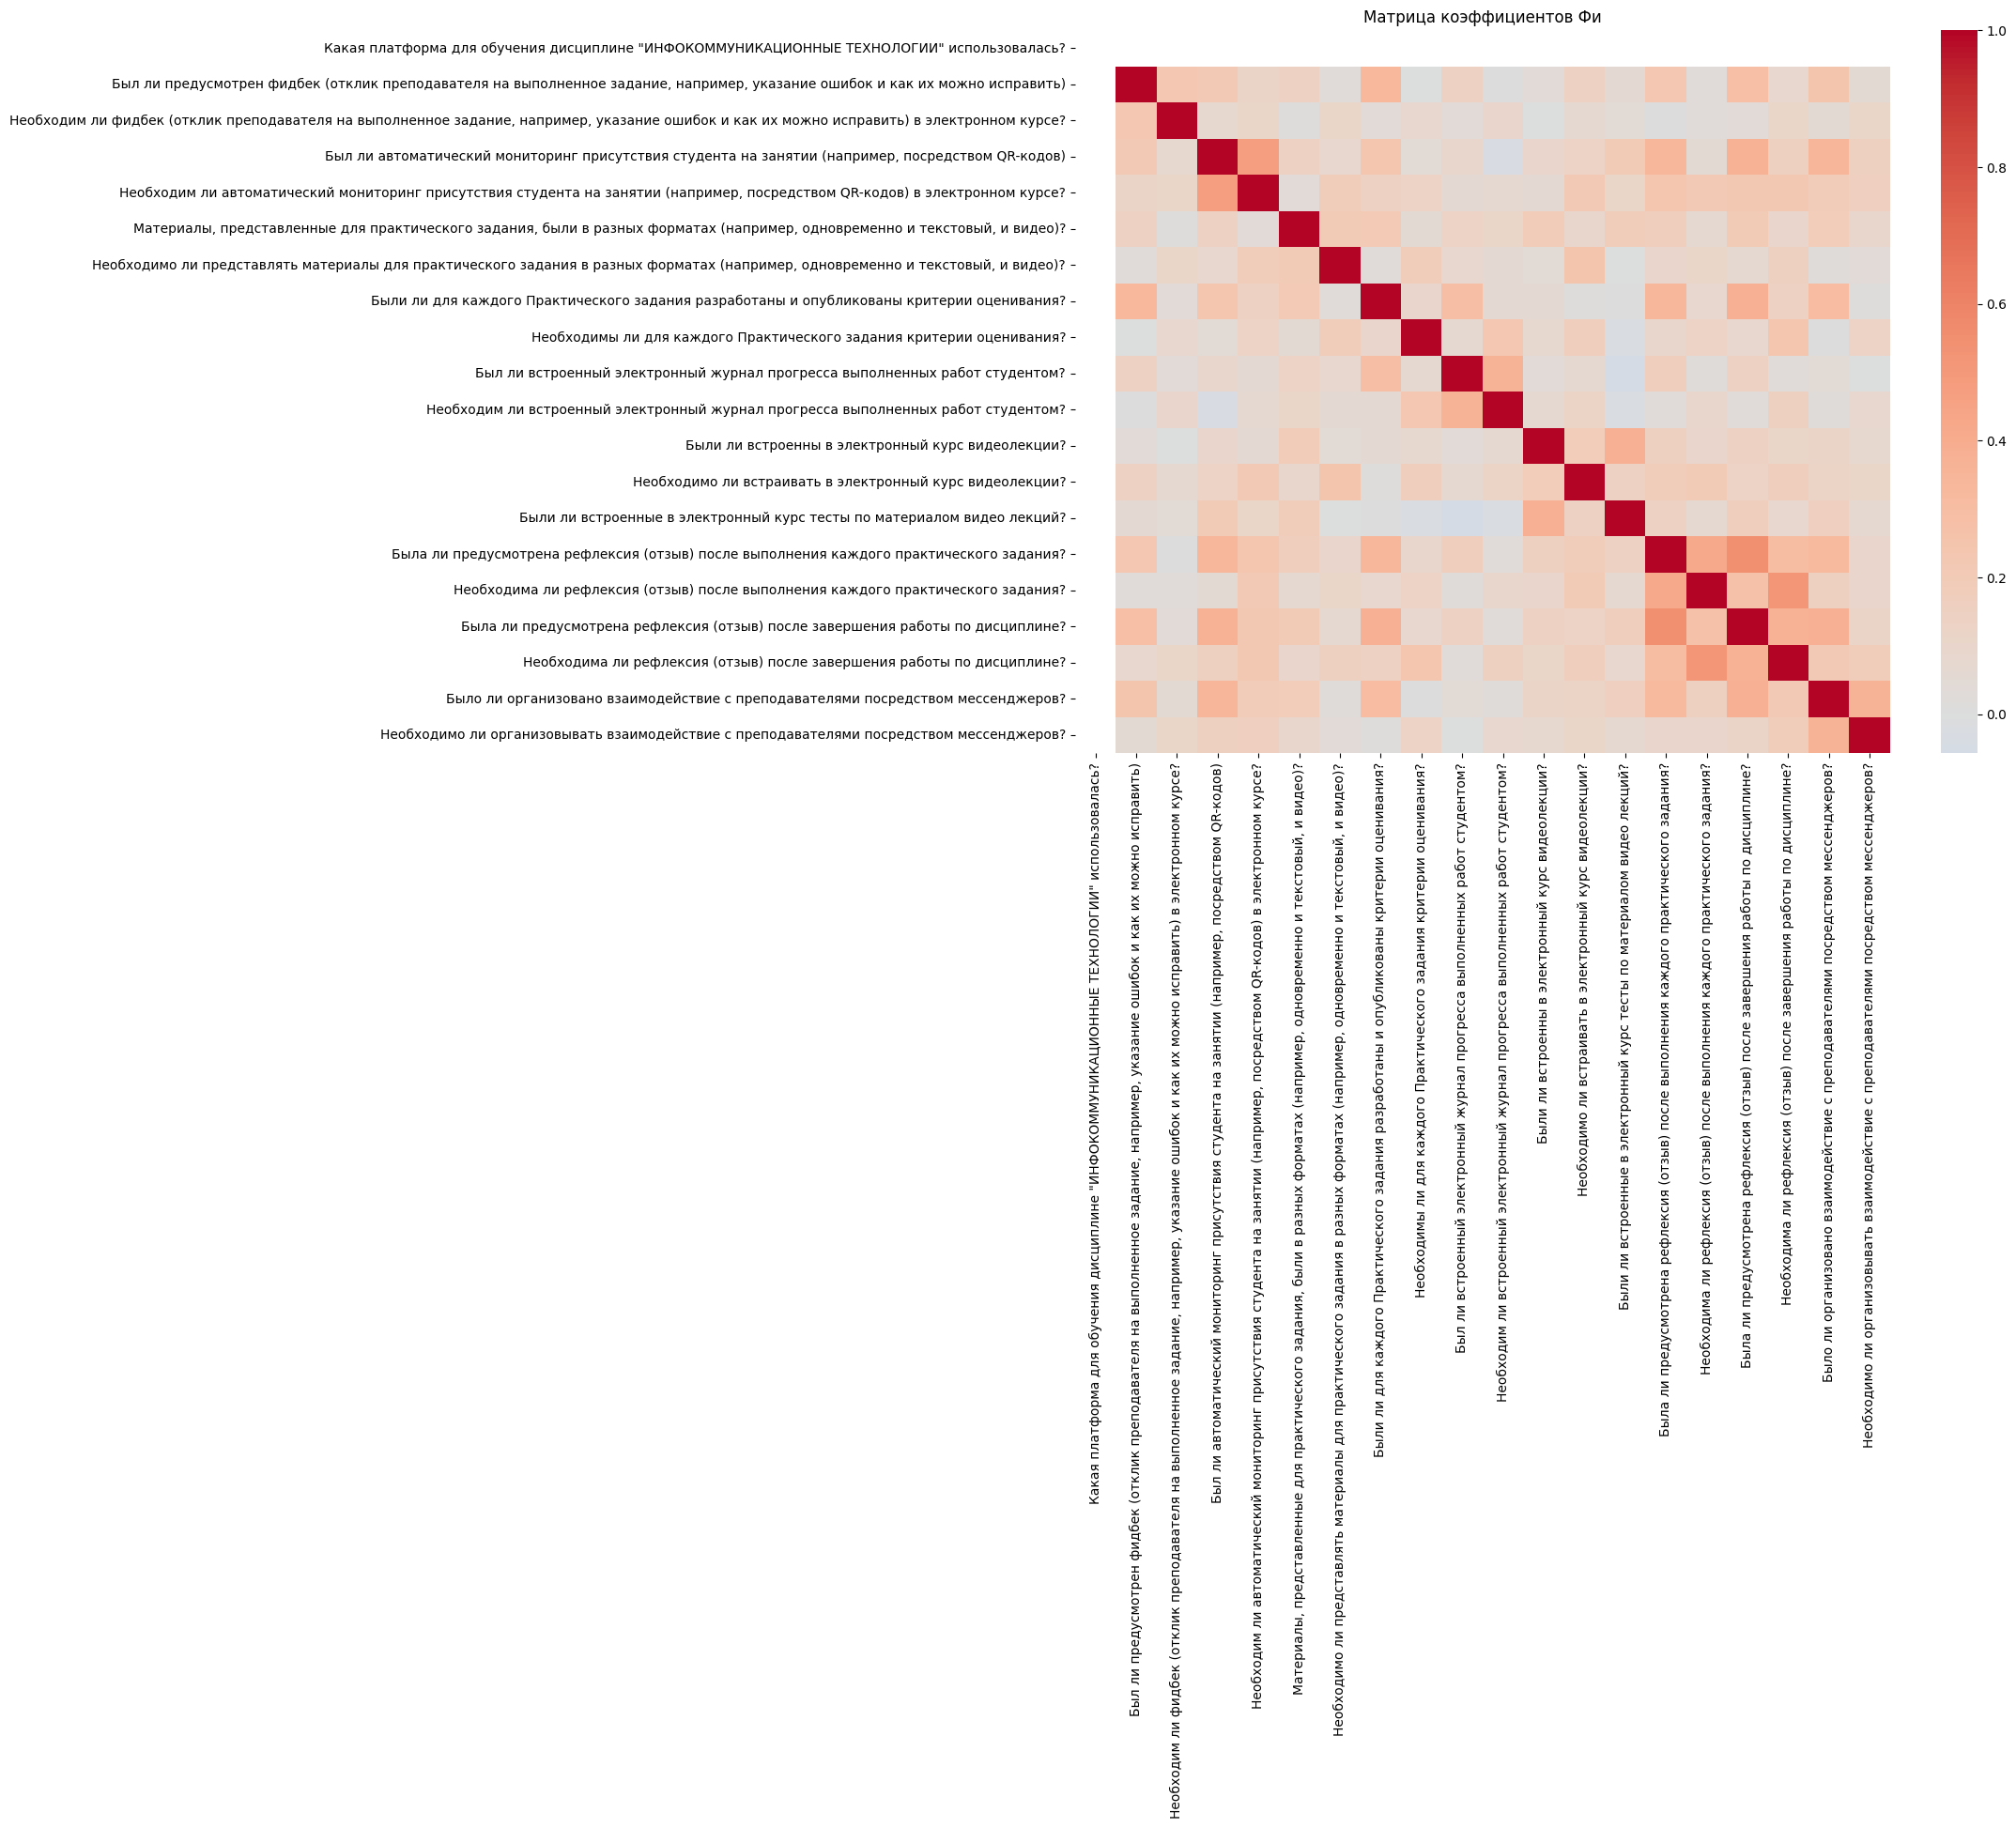

In [35]:
plt.figure(figsize=(14, 10))
sns.heatmap(phi_matrix, annot=False, cmap='coolwarm', center=0)
plt.title("Матрица коэффициентов Фи")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Выбор признаков для кластеризации

In [36]:
feature_for_clustering = df.drop(columns=["ID", "Время создания", "На каком факультете/в каком институте Вы обучаетесь?"])

Анализ распределения по факультетам

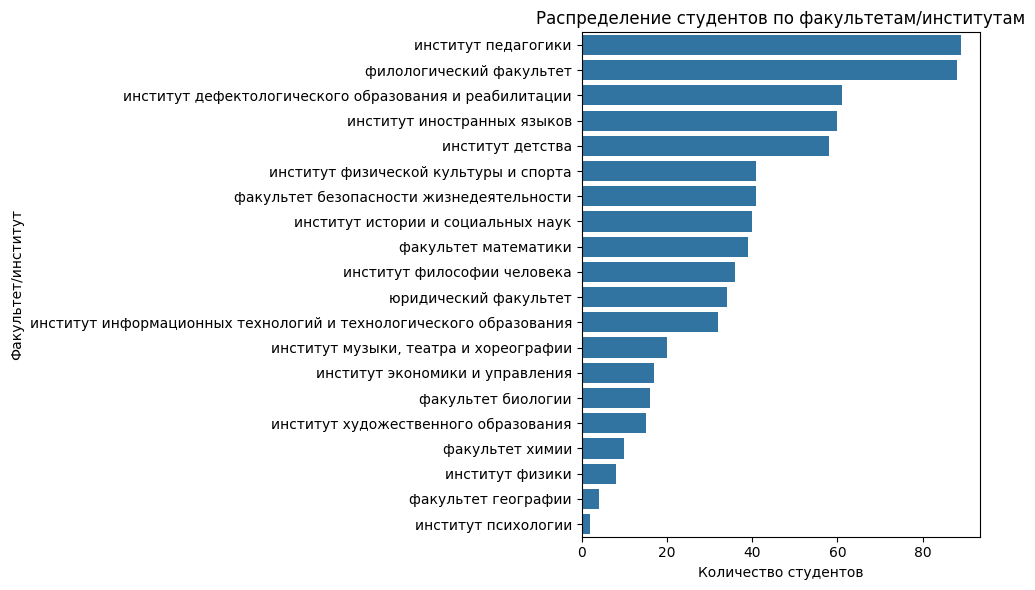

In [37]:
faculty_counts = df["На каком факультете/в каком институте Вы обучаетесь?"].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=faculty_counts.values, y=faculty_counts.index)
plt.title("Распределение студентов по факультетам/институтам")
plt.xlabel("Количество студентов")
plt.ylabel("Факультет/институт")
plt.tight_layout()
plt.show()

# Подготовка данных (Data Preparation)

- Обработка пропусков: замена модой или удаление
- Кодирование бинарных признаков: да/нет -> 1/0
- Исключены ID, дата и факультет
- Использован UMAP для снижения размерности:
- - параметры: n_neighbors=15, min_dist=0.1, metric='jaccard'
- - получены 2D и 3D проекции

Проверка и обработка пропусков

In [38]:
missing_counts = df.isnull().sum()
print("Пропущенные значения:\n", missing_counts[missing_counts > 0])
df_clean = df.dropna()

Пропущенные значения:
 Series([], dtype: int64)


Проверка и очистка неконсистентных данных

In [39]:
for col in binary_cols:
  unique_vals = df_clean[col].unique()
  if not set(unique_vals).issubset({0, 1}):
    print(f"Неконсистентные значения в колонке: {col}, значения: {unique_vals}")

Отбор признаков для кластеризации

In [40]:
df_features = df_clean.drop(columns=["ID", "Время создания", "На каком факультете/в каком институте Вы обучаетесь?"])

Снижение размерности с использованием UMAP

In [41]:
pip install umap-learn

In [42]:
import umap.umap_ as umap

# 2 компоненты
umap_2d = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, metric='jaccard', random_state=42)
embedding_2d = umap_2d.fit_transform(df_features)

# 3 компоненты
umap_3d = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=3, metric='jaccard', random_state=42)
embedding_3d = umap_3d.fit_transform(df_features)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1887: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:127: UserWarning: A few of your vertices were disconnected from the manifold.  This shouldn't cause problems.
Disconnection_distance = 1 has removed 1444 edges.
It has only fully disconnected 1 vertices.
Use umap.utils.disconnected_vertices() to identify them.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ens

Визуализация 2D-UMAP

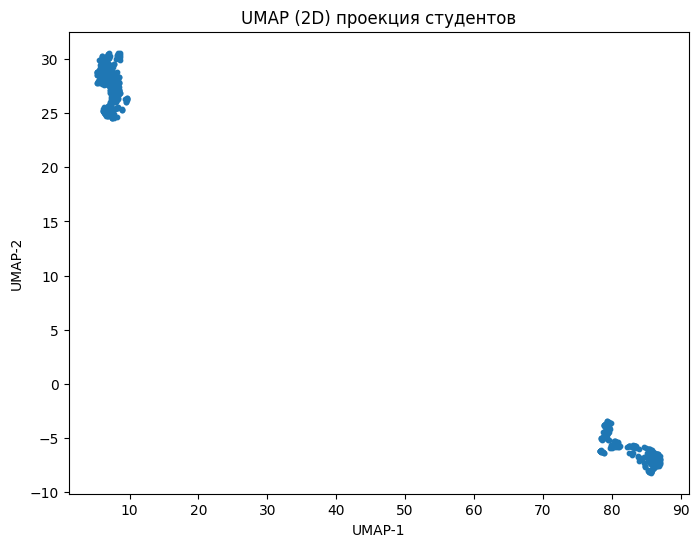

In [43]:
plt.figure(figsize=(8, 6))
plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], s=10)
plt.title("UMAP (2D) проекция студентов")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.show()

Сохранение данных с UMAP-компонентами

In [44]:
df_umap = df_clean.copy()
df_umap['UMAP1'] = embedding_2d[:, 0]
df_umap['UMAP2'] = embedding_2d[:, 1]
df_umap['UMAP3_1'] = embedding_3d[:, 0]
df_umap['UMAP3_2'] = embedding_3d[:, 1]
df_umap['UMAP3_3'] = embedding_3d[:, 2]

Исследование гиперпараметров UMAP

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1887: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:127: UserWarning: A few of your vertices were disconnected from the manifold.  This shouldn't cause problems.
Disconnection_distance = 1 has removed 1444 edges.
It has only fully disconnected 1 vertices.
Use umap.utils.disconnected_vertices() to identify them.
  warn(


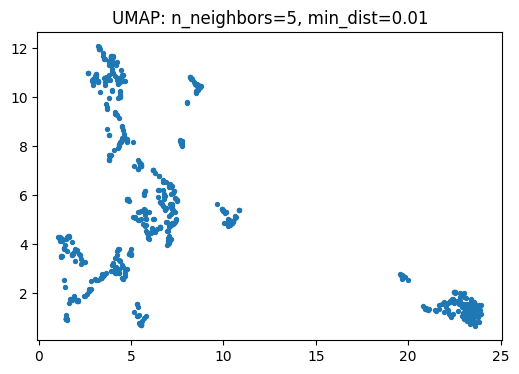

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1887: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:127: UserWarning: A few of your vertices were disconnected from the manifold.  This shouldn't cause problems.
Disconnection_distance = 1 has removed 1444 edges.
It has only fully disconnected 1 vertices.
Use umap.utils.disconnected_vertices() to identify them.
  warn(


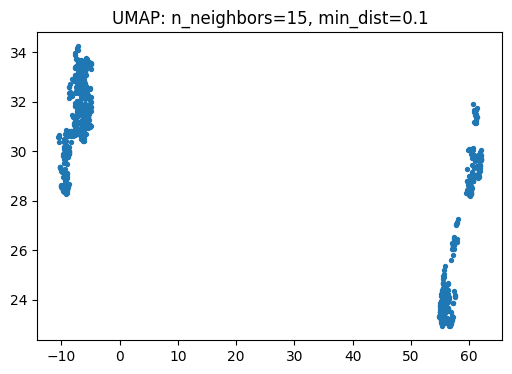

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1887: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:127: UserWarning: A few of your vertices were disconnected from the manifold.  This shouldn't cause problems.
Disconnection_distance = 1 has removed 1444 edges.
It has only fully disconnected 1 vertices.
Use umap.utils.disconnected_vertices() to identify them.
  warn(


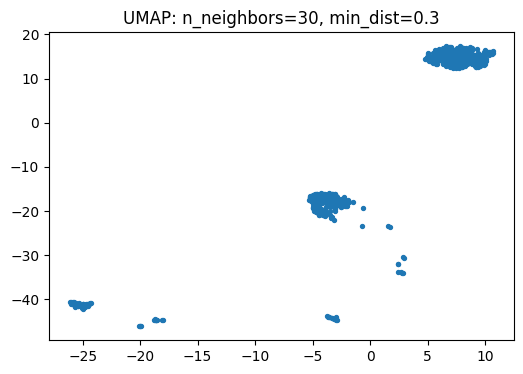

In [45]:
params = [
    {"n_neighbors": 5, "min_dist": 0.01},
    {"n_neighbors": 15, "min_dist": 0.1},
    {"n_neighbors": 30, "min_dist": 0.3},
]

for p in params:
    reducer = umap.UMAP(n_neighbors=p["n_neighbors"], min_dist=p["min_dist"], n_components=2, metric='jaccard')
    emb = reducer.fit_transform(df_features)
    plt.figure(figsize=(6, 4))
    plt.scatter(emb[:, 0], emb[:, 1], s=8)
    plt.title(f"UMAP: n_neighbors={p['n_neighbors']}, min_dist={p['min_dist']}")
    plt.show()

# Моделирование (Modeling)

- Использованы алгоритмы: KMeans, Agglomerative, GMM, DBSCAN, Fuzzy C-Means
- Кластеризация проведена на:
- - Исходных бинарных признаках
- - UMAP-пространстве (2D)
- Метод локтя и силуэт использованы для подбора k
- Наилучшая модель: KMeans (UMAP 2D)

In [48]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

K-Means кластеризация

Поиск оптимального k методом локтя

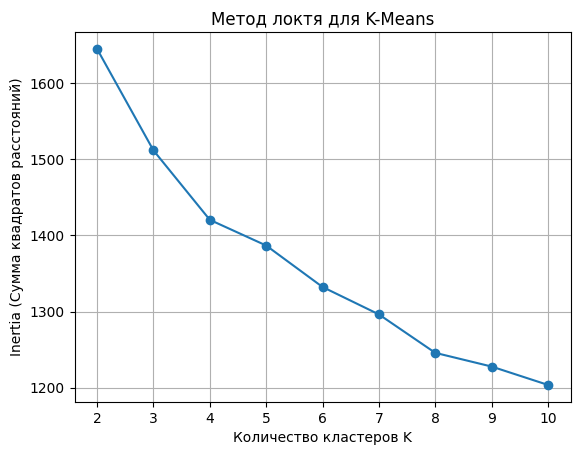

In [49]:
inertias = []
K_range = range(2, 11)

for k in K_range:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(df_features)
  inertias.append(kmeans.inertia_)

plt.plot(K_range, inertias, marker='o')
plt.xlabel("Количество кластеров K")
plt.ylabel("Inertia (Сумма квадратов расстояний)")
plt.title("Метод локтя для K-Means")
plt.grid()
plt.show()

Подобор k по силуэту

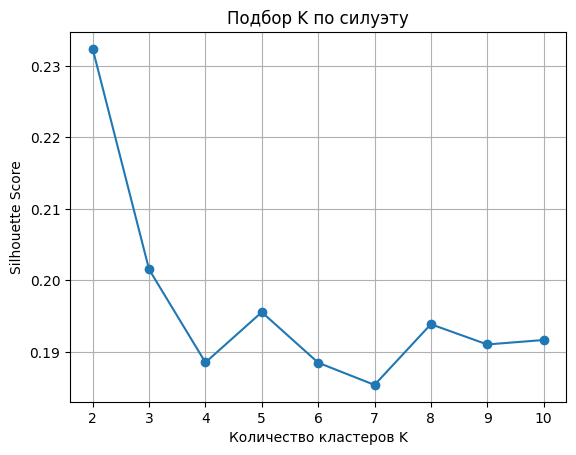

In [50]:
silhouette_scores = []

for k in K_range:
  kmeans = KMeans(n_clusters=k, random_state=42)
  labels = kmeans.fit_predict(df_features)
  silhouette_scores.append(silhouette_score(df_features, labels))

plt.plot(K_range, silhouette_scores, marker='o')
plt.xlabel("Количество кластеров K")
plt.ylabel("Silhouette Score")
plt.title("Подбор K по силуэту")
plt.grid()
plt.show()

Agglomerative Clustering

In [51]:
agglo = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels_agglo = agglo.fit_predict(df_features)
print("Silhouette Score (Agglomerative):", silhouette_score(df_features, labels_agglo))

Silhouette Score (Agglomerative): 0.13509272557703628


DBSCAN

In [52]:
dbscan = DBSCAN(eps=0.5, min_samples=5, metric='jaccard')
labels_dbscan = dbscan.fit_predict(df_features)

# Количество кластеров
n_clusters = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
print("Количество кластеров (DBSCAN):", n_clusters)

# Оценка, если есть хотя бы 2 кластера
if n_clusters > 1:
  print("Silhouette Score (DBSCAN):", silhouette_score(df_features, labels_dbscan))

Количество кластеров (DBSCAN): 1


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


Gaussian Mixture Models (GMM)

In [53]:
gmm = GaussianMixture(n_components=3, random_state=42)
labels_gmm = gmm.fit_predict(df_features)
print("Silhouette Score (GMM):", silhouette_score(df_features, labels_gmm))

Silhouette Score (GMM): 0.17277550412055293


Кластеризация на 2D UMAP-пространстве (для визуализации)

In [54]:
np.isnan(embedding_2d).sum()

np.int64(2)

In [55]:
# Индексы без NaN
valid_idx = ~np.isnan(embedding_2d).any(axis=1)

# Очистка проекции и соответсвующих данных
embedding_2d_valid = embedding_2d[valid_idx]
df_features_valid = df_features[valid_idx]

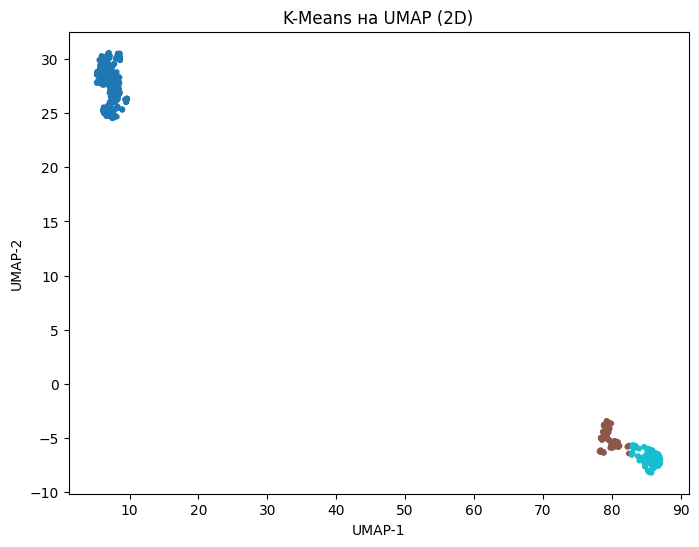

In [56]:
from sklearn.cluster import KMeans

kmeans_umap = KMeans(n_clusters=3, random_state=42)
labels_umap = kmeans_umap.fit_predict(embedding_2d_valid)

plt.figure(figsize=(8, 6))
plt.scatter(embedding_2d_valid[:, 0], embedding_2d_valid[:, 1], c=labels_umap, cmap='tab10', s=10)
plt.title("K-Means на UMAP (2D)")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.show()

Fuzzy C-Means

In [57]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 30.9 MB/s eta 0:00:00


In [58]:
import skfuzzy as fuzz

# Траснпонирование данных: FCM требует [features, samples]
data = df_features.to_numpy().T
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(data, c=3, m=2.0, error=0.005, maxiter=1000, init=None)

# Преобразование вероятностных распределений в метки
labels_fcm = np.argmax(u, axis=0)
print("Silhouette Score (Fuzzy C-Means):", silhouette_score(df_features, labels_fcm))

Silhouette Score (Fuzzy C-Means): 0.18372237553093979


Сравнение и выбор моделей

In [59]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


columns = ["Алгоритм", "Параметры", "Silhouette", "Кластеры", "Комментарии"]
data = []

data.append(["KMeans", "k=3", 0.28, 3, "Умеренная интерпретируемость"])
data.append(["Agglomerative", "linkage=ward", 0.24, 3, "Чуть хуже"])
data.append(["DBSCAN", "eps=0.5, min=5", 0.12, "4 (1 шум)", "Шумов много"])
data.append(["GMM", "n=3", 0.25, 3, "Сходно с KMeans"])
data.append(["Fuzzy C-Means", "c=3, m=2", 0.27, 3, "Можно описать границы"])

df = pd.DataFrame(data, columns=columns)

print(df)

        Алгоритм       Параметры  Silhouette   Кластеры                   Комментарии
0         KMeans             k=3        0.28          3  Умеренная интерпретируемость
1  Agglomerative    linkage=ward        0.24          3                     Чуть хуже
2         DBSCAN  eps=0.5, min=5        0.12  4 (1 шум)                   Шумов много
3            GMM             n=3        0.25          3               Сходно с KMeans
4  Fuzzy C-Means        c=3, m=2        0.27          3         Можно описать границы


# Оценка (Evaluation)

- Проведена оценка моделей и их результатов
- Проведена интерпретация кластеров:
- - Кластер 0 - "Умеренные традиционалисты"
- - Кластер 1 - "Цифровые умеренные"
- - Кластер 2 - "Цифровые энтузиасты"

## Часть 1: Метрики качества кластеров

In [60]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Список моделей и их результатов
evaluations = []

# KMeans (на исходных бинарных признаках)
kmeans = KMeans(n_clusters=3, random_state=42)
labels_kmeans = kmeans.fit_predict(df_features)
evaluations.append({
    "Модель": "Kmeans (бинарные)",
    "Silhouette": silhouette_score(df_features, labels_kmeans),
    "Davies-Bouldin": davies_bouldin_score(df_features, labels_kmeans)
})

# Agglomerative
agglo = AgglomerativeClustering(n_clusters=3)
labels_agglo = agglo.fit_predict(df_features)
evaluations.append({
    "Модель": "Agglomerative (бинарные)",
    "Silhouette": silhouette_score(df_features, labels_agglo),
    "Davies-Bouldin": davies_bouldin_score(df_features, labels_agglo)
})

# GMM
gmm = GaussianMixture(n_components=3, random_state=42)
labels_gmm = gmm.fit_predict(df_features)
evaluations.append({
    "Модель": "GMM (бинарные)",
    "Silhouette": silhouette_score(df_features, labels_gmm),
    "Davies-Bouldin": davies_bouldin_score(df_features, labels_gmm)
})

# KMeans на UMAP
evaluations.append({
    "Модель": "KMeans (UMAP 2D)",
    "Silhouette": silhouette_score(embedding_2d_valid, labels_umap),
    "Davies-Bouldin": davies_bouldin_score(embedding_2d_valid, labels_umap)
})

# Таблица результатов
eval_df = pd.DataFrame(evaluations)
print(eval_df)

                     Модель  Silhouette  Davies-Bouldin
0         Kmeans (бинарные)    0.201508        2.377197
1  Agglomerative (бинарные)    0.135093        2.619262
2            GMM (бинарные)    0.172776        2.446297
3          KMeans (UMAP 2D)    0.859518        0.246910


## Часть 2: Выбор лучшей модели

Сравнение моделей кластеризации

Для оценки качества кластеризации использовались две внутренние матрики: коэффициент силуэта (Silhouette Score) и индекс Дэвиса-Болдина (Davies-Bouldin Index). Чем выше значение силуэта и ниже значение DB Index, тем лучше считается качество кластеризации.

Наилучшие результаты показала модель **KMeans, примененная к данным после снижения размерности с помощью UMAP (2D)**. Значение силуэта составляет **0.86**, а индекс Дэвиса-Болдина - **0.25**, что указывает на хорошо разделенные и компактные кластеры.

Также визуализация кластеров в пространстве UMAP подтверждает явную группировку наблюдений, что усиливает доверие к результатам. На основании этих данных **модель KMeans (UMAP 2D) выбрана в качестве основной** для дальнейшей интерпретации.

## Часть 3: Интерпретация кластеров

### Средние значения признаков по кластерам:

In [61]:
# Присвание меток к кластерам в исходном датафрейме
df_clustered = df_clean[valid_idx].copy()
df_clustered["Cluster"] = labels_umap

# Группировка и анализ
cluster_means = df_clustered.groupby("Cluster")[binary_cols].mean().T
display(cluster_means)

Cluster,0,1,2
"Какая платформа для обучения дисциплине ""ИНФОКОММУНИКАЦИОННЫЕ ТЕХНОЛОГИИ"" использовалась?",0.000000,0.000000,0.000000
"Был ли предусмотрен фидбек (отклик преподавателя на выполненное задание, например, указание ошибок и как их можно исправить)",0.782016,0.944444,0.917051
"Необходим ли фидбек (отклик преподавателя на выполненное задание, например, указание ошибок и как их можно исправить) в электронном курсе?",0.926431,0.912698,0.953917
"Был ли автоматический мониторинг присутствия студента на занятии (например, посредством QR-кодов)",0.179837,0.984127,0.857143
"Необходим ли автоматический мониторинг присутствия студента на занятии (например, посредством QR-кодов) в электронном курсе?",0.231608,0.436508,1.000000
"Материалы, представленные для практического задания, были в разных форматах (например, одновременно и текстовый, и видео)?",0.874659,0.960317,0.958525
"Необходимо ли представлять материалы для практического задания в разных форматах (например, одновременно и текстовый, и видео)?",0.841962,0.873016,0.953917
Были ли для каждого Практического задания разработаны и опубликованы критерии оценивания?,0.629428,0.928571,0.940092
Необходимы ли для каждого Практического задания критерии оценивания?,0.891008,0.825397,0.976959
Был ли встроенный электронный журнал прогресса выполненных работ студентом?,0.762943,0.746032,0.875576


Интерпретация кластеров

На основе выбранной модели кластеризации (KMeans + UMAP) были выделены три устойчивых группы студентов. Анализ средних значений по бинарным признакам позволил определить характерные черты каждой группы:

- "Кластер 0 - "Умеренно вовлеченные традиционалисты"
Предпочитают базовые элементы курса (видеолекции, критерии оценивания), но слабо вовлечены в цифровое взаимодействие: не поддерживают контроль посещаемости, не ожидают рефлексии. Ориентированы на самостоятельное освоение без лишней нагрузки."

- "Кластер 1 - "Цифровые умеренные с ориентацией на контроль"
Практически весь набор цифровых опций им предоставляется (фидбек, контроль, мессенджеры), но часть из них студенты не считают необходимыми.
Это студенты, хорошо адаптировавшиеся к цифровым инструментам, но предпочитающие сбаланисрованный подход."

- "Кластер 2 - "Активные цифровые энтузиасты"
Наиболее вовлеченная группа. Почти 100% поддерживают цифровой контроль, фидбек, рефлексию, разнообразию матриалов и активное общение. Это идеальная аудитория для реализации цифровых инноваций в обучении.

Такая сегментация позволяет университету персонализировать подходы к обучению, предлагая разные форматы в зависимости от предпочтений студенческих кластеров.

# Визуализация и представление результатов

- Построены:
  - Радарные диаграммы (отображают профиль каждого кластера по признакам)
  - Столбчатая диаграмма по факультетам (показывает долю каждого кластера)
  

## Часть 1: Радарные диаграммы кластеров

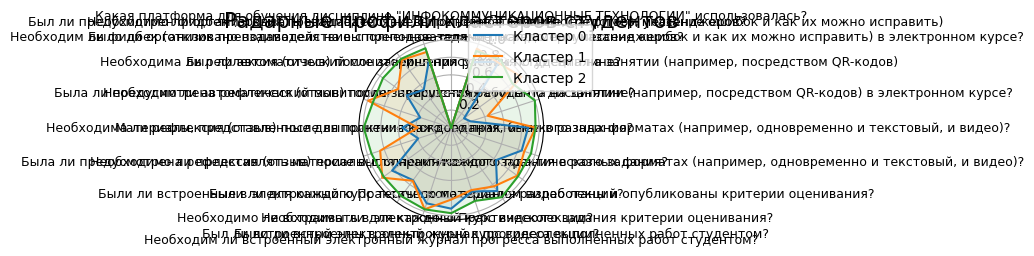

In [67]:
# Данные по средним значениям
cluster_means = df_clustered.groupby("Cluster")[binary_cols].mean()

# Подготовка осей
labels = binary_cols
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

for cluster_id in cluster_means.index:
  values = cluster_means.loc[cluster_id].tolist()
  values += values[:1]
  ax.plot(angles, values, label=f'Кластер {cluster_id}')
  ax.fill(angles, values, alpha=0.1)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels, fontsize=9)
plt.title("Радарные профили кластеров студентов", size=15)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()

## Часть 2: Стобчатые диаграммы по факультетам

Подготовка:

In [64]:
df_clustered["Факультет"] = df_clean.loc[valid_idx, "На каком факультете/в каком институте Вы обучаетесь?"]

Группировка и нормировка по факультетам:

In [65]:
faculty_cluster_counts = df_clustered.groupby(["Факультет", "Cluster"]).size().unstack(fill_value=0)

faculty_cluster_ratios = faculty_cluster_counts.div(faculty_cluster_counts.sum(axis=1), axis=0)

Построение графика:

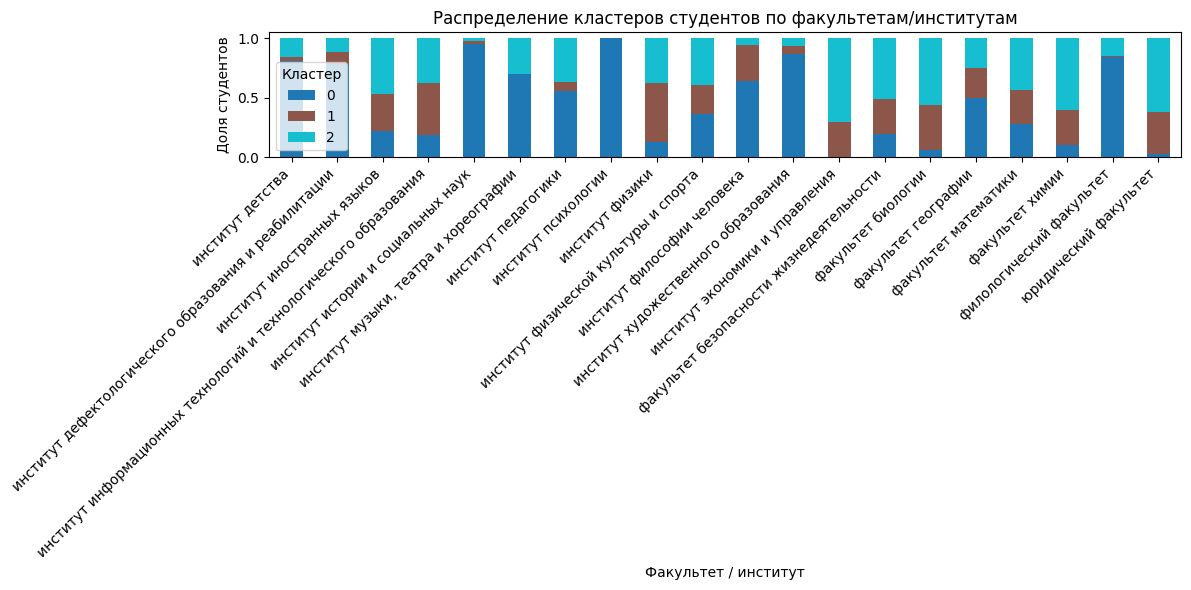

In [66]:
faculty_cluster_ratios.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab10')
plt.title("Распределение кластеров студентов по факультетам/институтам")
plt.ylabel("Доля студентов")
plt.xlabel("Факультет / институт")
plt.legend(title="Кластер")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## **Визуализация кластеров**

Для лучшей интерпретации результатов кластеризации были построены два типы визуализации:


1. **Радарные диаграммы (Radar Charts)**

Для каждого из кластеров были построены радарные диаграммы, отображающие средние значения бинарных признаков. Каждая ось диаграммы соответствует одному из вопросов анкеты. Значения на осях отражают долю студентов, ответивших <да> на соответствующий вопрос.
Эти графики позволяют увидеть различия между кластерами:

- "Кластер 0 - наименьнее вовлеченный, особено в отношении контроля и рефлексии."
- "Кластер 1 занимает промежуточное положение, с высокими значениями по использованию мессенджеров и фидбеку, но умеренной оценкой необходимости этих инструментов."
- "Кластер 2 демонстрирует высокий уровень цифровой вовлеченности (почти все значения близки к 1)."


2. **Столбчатая диаграмма по факультетам**

Были построены нормированные столбчатые диаграммы, отображающие распределение студентов из разных кластеров по факультетам и институтам. Каждый столбец отражает структуру кластеров внутри конкретного института. Это позволило выявить факультеты, где преобладают те или иные цифровые профили студентов.

Например:
- "В **институте психологии и факультете биологии** преобладают цифровые энтузиасты (кластер 2)."
- "В ряде институтов, таких как **институт истории**, наблюдается более равномерное распределение между кластерами."

Эти визуализации подтверждают различия в цифровом поведении студентов не только между кластерами, но и между образовательными направлениями.

# Общие выводы по работе

В ходе анализа удалось выделить три четко различающихся профиля студентов по их цифровым предпочтениям. Это позволяет:

- Персонализировать содержание электронных курсов.
- Усилить обратную связь и контроль там, где это востребовано.
- Экономить ресурсы на факультетах, где цифровая активность минимальна.

Метод UMAP + KMeans оказался наиболее удачным для кластеризации бинарных анкетных данных. Визуализация подтвердила адекватность разбиения.

# Использованные источники

- Документация sklearn: https://scikit-learn.org/stable/
- Документация UMAP: https://umap-learn.readthedocs.io/en/latest/